In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Given standardized values
net_profit_std = np.array([
    -0.4469727, -0.22194001, -0.23760006, -0.26339622, -0.34984825, 
    -2.11884332,  0.20619058, -0.29932852, -0.24360665, -1.84951201,  
     0.60541445,  0.3772712,  0.38402862, -4.16430253,  0.33152457,  
     0.28958568, -0.39682838,  0.39577365,  0.5129022,  0.44967209,  
     0.89212198,  0.72243574,  0.45187094,  0.28996109,  0.42151619,  
     0.46173891,  0.40751869,  0.31468466,  0.42977526,  0.68569899,  
     0.1840949,  0.23423922,  0.41749392,  1.7912874,  0.41272082,  
     0.52341374,  0.33715575,  0.4378198,  0.2187937,  0.18522114,  
    -3.14709685, -0.31472041,  0.37340982,  0.25258078,  0.05607941
])

# Prepare features (X) and target (y)
X = np.arange(len(net_profit_std)).reshape(-1, 1)  # Time steps
y = net_profit_std  # Standardized net profit values

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the next quarter
next_quarter = np.array([[len(net_profit_std)]])  # Next time step
next_quarter_pred = model.predict(next_quarter)

print(f"Predicted standardized net profit for next quarter: {next_quarter_pred[0]:.4f}")


Predicted standardized net profit for next quarter: 0.3906


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Standardized net profit values
standardized_net_profit = np.array([
    -0.4469727, -0.22194001, -0.23760006, -0.26339622, -0.34984825, 
    -2.11884332,  0.20619058, -0.29932852, -0.24360665, -1.84951201,  
     0.60541445,  0.3772712,  0.38402862, -4.16430253,  0.33152457,  
     0.28958568, -0.39682838,  0.39577365,  0.5129022,  0.44967209,  
     0.89212198,  0.72243574,  0.45187094,  0.28996109,  0.42151619,  
     0.46173891,  0.40751869,  0.31468466,  0.42977526,  0.68569899,  
     0.1840949,  0.23423922,  0.41749392,  1.7912874,  0.41272082,  
     0.52341374,  0.33715575,  0.4378198,  0.2187937,  0.18522114,  
    -3.14709685, -0.31472041,  0.37340982,  0.25258078,  0.05607941
])

# Generate indices as features (quarters 1 to n)
X = np.arange(len(standardized_net_profit)).reshape(-1, 1)
y = standardized_net_profit

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the next quarter (n+1)
next_quarter_index = np.array([[len(standardized_net_profit)]])
standardized_prediction = model.predict(next_quarter_index)[0]

# Given mean and std (you need to replace these with actual values used for z-score transformation)
mean_original = np.mean([-139.44, -97.48, -100.4, -105.21, -121.33, -451.18, -17.65, -111.91, -101.52, -400.96, 
    56.79, 14.25, 15.51, -832.58, 5.72, -2.1, -130.09, 17.7, 39.54, 27.75, 
    110.25, 78.61, 28.16, -2.03, 22.5, 30, 19.89, 2.58, 24.04, 71.76, 
    -21.77, -12.42, 21.75, 277.91, 20.86, 41.5, 6.77, 25.54, -15.3, -21.56, 
    -642.91, -114.78, 13.53, -9, -45.64])

std_original = np.std([-139.44, -97.48, -100.4, -105.21, -121.33, -451.18, -17.65, -111.91, -101.52, -400.96, 
    56.79, 14.25, 15.51, -832.58, 5.72, -2.1, -130.09, 17.7, 39.54, 27.75, 
    110.25, 78.61, 28.16, -2.03, 22.5, 30, 19.89, 2.58, 24.04, 71.76, 
    -21.77, -12.42, 21.75, 277.91, 20.86, 41.5, 6.77, 25.54, -15.3, -21.56, 
    -642.91, -114.78, 13.53, -9, -45.64])

# Convert back to original scale
original_prediction = (standardized_prediction * std_original) + mean_original

print(f"Predicted next quarter's net profit: {original_prediction}")

Predicted next quarter's net profit: 16.728090782385323


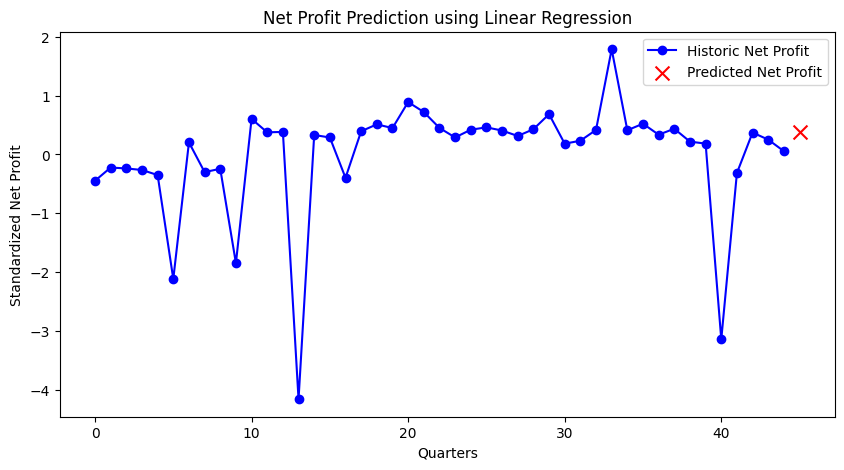

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given standardized net profit values
z_scores = np.array([
    -0.4469727, -0.22194001, -0.23760006, -0.26339622, -0.34984825, 
    -2.11884332,  0.20619058, -0.29932852, -0.24360665, -1.84951201,  
     0.60541445,  0.3772712,  0.38402862, -4.16430253,  0.33152457,  
     0.28958568, -0.39682838,  0.39577365,  0.5129022,  0.44967209,  
     0.89212198,  0.72243574,  0.45187094,  0.28996109,  0.42151619,  
     0.46173891,  0.40751869,  0.31468466,  0.42977526,  0.68569899,  
     0.1840949,  0.23423922,  0.41749392,  1.7912874,  0.41272082,  
     0.52341374,  0.33715575,  0.4378198,  0.2187937,  0.18522114,  
    -3.14709685, -0.31472041,  0.37340982,  0.25258078,  0.05607941
])

# Generating time indices for the quarters
time_indices = np.arange(len(z_scores)).reshape(-1, 1)

# Linear regression model
model = LinearRegression()
model.fit(time_indices, z_scores)
next_quarter = np.array([[len(z_scores)]])
predicted_z = model.predict(next_quarter)

# Reverse z-score transformation
mean_net_profit = np.mean([
    -139.44, -97.48, -100.4, -105.21, -121.33, -451.18, -17.65, -111.91, -101.52, -400.96, 
     56.79, 14.25, 15.51, -832.58, 5.72, -2.1, -130.09, 17.7, 39.54, 27.75, 
     110.25, 78.61, 28.16, -2.03, 22.5, 30, 19.89, 2.58, 24.04, 71.76, 
     -21.77, -12.42, 21.75, 277.91, 20.86, 41.5, 6.77, 25.54, -15.3, -21.56, 
     -642.91, -114.78, 13.53, -9, -45.64
])
std_net_profit = np.std([
    -139.44, -97.48, -100.4, -105.21, -121.33, -451.18, -17.65, -111.91, -101.52, -400.96, 
     56.79, 14.25, 15.51, -832.58, 5.72, -2.1, -130.09, 17.7, 39.54, 27.75, 
     110.25, 78.61, 28.16, -2.03, 22.5, 30, 19.89, 2.58, 24.04, 71.76, 
     -21.77, -12.42, 21.75, 277.91, 20.86, 41.5, 6.77, 25.54, -15.3, -21.56, 
     -642.91, -114.78, 13.53, -9, -45.64
])

predicted_net_profit = predicted_z * std_net_profit + mean_net_profit

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time_indices, z_scores, marker='o', linestyle='-', color='blue', label='Historic Net Profit')
plt.scatter(len(z_scores), predicted_z, color='red', label='Predicted Net Profit', marker='x', s=100)
plt.xlabel("Quarters")
plt.ylabel("Standardized Net Profit")
plt.title("Net Profit Prediction using Linear Regression")
plt.legend()
plt.show()


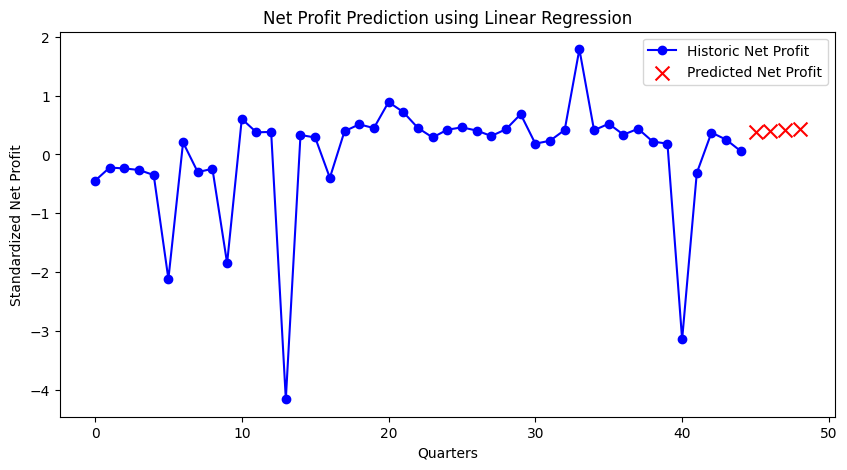

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given standardized net profit values
z_scores = np.array([
    -0.4469727, -0.22194001, -0.23760006, -0.26339622, -0.34984825, 
    -2.11884332,  0.20619058, -0.29932852, -0.24360665, -1.84951201,  
     0.60541445,  0.3772712,  0.38402862, -4.16430253,  0.33152457,  
     0.28958568, -0.39682838,  0.39577365,  0.5129022,  0.44967209,  
     0.89212198,  0.72243574,  0.45187094,  0.28996109,  0.42151619,  
     0.46173891,  0.40751869,  0.31468466,  0.42977526,  0.68569899,  
     0.1840949,  0.23423922,  0.41749392,  1.7912874,  0.41272082,  
     0.52341374,  0.33715575,  0.4378198,  0.2187937,  0.18522114,  
    -3.14709685, -0.31472041,  0.37340982,  0.25258078,  0.05607941
])

# Generating time indices for the quarters
time_indices = np.arange(len(z_scores)).reshape(-1, 1)

# Linear regression model
model = LinearRegression()
model.fit(time_indices, z_scores)
next_quarters = np.array([[len(z_scores) + i] for i in range(4)])
predicted_z = model.predict(next_quarters)

# Reverse z-score transformation
mean_net_profit = np.mean([
    -139.44, -97.48, -100.4, -105.21, -121.33, -451.18, -17.65, -111.91, -101.52, -400.96, 
     56.79, 14.25, 15.51, -832.58, 5.72, -2.1, -130.09, 17.7, 39.54, 27.75, 
     110.25, 78.61, 28.16, -2.03, 22.5, 30, 19.89, 2.58, 24.04, 71.76, 
     -21.77, -12.42, 21.75, 277.91, 20.86, 41.5, 6.77, 25.54, -15.3, -21.56, 
     -642.91, -114.78, 13.53, -9, -45.64
])
std_net_profit = np.std([
    -139.44, -97.48, -100.4, -105.21, -121.33, -451.18, -17.65, -111.91, -101.52, -400.96, 
     56.79, 14.25, 15.51, -832.58, 5.72, -2.1, -130.09, 17.7, 39.54, 27.75, 
     110.25, 78.61, 28.16, -2.03, 22.5, 30, 19.89, 2.58, 24.04, 71.76, 
     -21.77, -12.42, 21.75, 277.91, 20.86, 41.5, 6.77, 25.54, -15.3, -21.56, 
     -642.91, -114.78, 13.53, -9, -45.64
])

predicted_net_profit = predicted_z * std_net_profit + mean_net_profit

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time_indices, z_scores, marker='o', linestyle='-', color='blue', label='Historic Net Profit')
plt.scatter(next_quarters, predicted_z, color='red', label='Predicted Net Profit', marker='x', s=100)
plt.xlabel("Quarters")
plt.ylabel("Standardized Net Profit")
plt.title("Net Profit Prediction using Linear Regression")
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
input_file = "quater_test.xlsx"

In [6]:
df = pd.read_excel(input_file)
df.head(5)

,Quarterly Results of 3i Infotech(in Rs. Cr.),Net sales/income from operations,Total income from operations,Employees cost,depreciat,Other expenses,"P/l before other inc. , int., excpt. items & tax",Other income,"P/l before int., excpt. items & tax",Interest,P/l before exceptional items & tax,P/l before tax,Tax,P/l after tax from ordinary activities,Net profit/(loss) for the period,Equity share capital,Basic eps,Diluted eps,Basic eps.,Diluted eps.
0,Dec '13,90.95,90.95,43.95,67.07,30.53,-50.60,-1.12,-51.72,87.49,-139.21,-139.21,0.23,-139.44,-139.44,571.94,-2.52,-2.52,-2.52,-2.52
1,Sep '13,78.26,78.26,38.63,55.44,27.47,-43.28,21.86,-21.42,74.56,-95.98,-95.98,1.50,-97.48,-97.48,571.94,-1.79,-1.79,-1.79,-1.79
2,Sep '14,108.29,108.29,42.54,52.49,61.74,-48.48,0.10,-48.38,52.02,-100.40,-100.40,0.00,-100.40,-100.40,580.68,-1.82,-1.82,-1.82,-1.82
3,Jun '14,93.17,93.17,43.90,58.04,41.54,-50.31,1.39,-48.92,56.29,-105.21,-105.21,0.00,-105.21,-105.21,576.34,-1.92,-1.92,-1.92,-1.92
4,Mar '14,79.08,79.08,41.18,57.31,27.76,-47.17,10.78,-36.39,64.37,-100.76,-136.61,-15.28,-121.33,-121.33,572.64,-1.58,-1.58,-2.20,-2.20


In [ ]:
totalIncome= df["Total income from operations"].tolist() + 

[90.95,
 78.26,
 108.29,
 93.17,
 79.08,
 105.8,
 79.54,
 84.08,
 81.77,
 93.46,
 64.57,
 55.93,
 81.33,
 84.85,
 66.99,
 58.12,
 57.72,
 55.38,
 58.7,
 66.29,
 74.27,
 75.67,
 80.98,
 74.21,
 75.28,
 91.6,
 86.72,
 86.33,
 81.58,
 91.48,
 46.86,
 58.63,
 53.1,
 52.22,
 54.01,
 69.65,
 68.62,
 62.58,
 82.78,
 75.4,
 91.64,
 91.07,
 89.4,
 89.77,
 91.83]

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


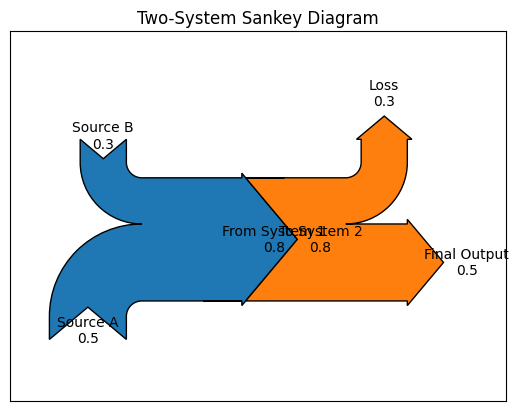

In [14]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# First system
sankey = Sankey()
sankey.add(flows=[0.5, 0.3, -0.8],
           labels=['Source A', 'Source B', 'To System 2'],
           orientations=[-1, 1, 0])

# Second system connected to the first
sankey.add(flows=[0.8, -0.5, -0.3],
           labels=['From System 1', 'Final Output', 'Loss'],
           orientations=[0, 0, 1],
           prior=0,  # Connects to the first diagram (index 0)
           connect=(2, 0))  # Connects "To System 2" to "From System 1"

sankey.finish()
plt.title("Two-System Sankey Diagram")
plt.show()

In [20]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[
            "Operations",      # 0
            "Other Income",    # 1
            "Revenue",         # 2
            "Employees Cost",  # 3
            "Depreciation",    # 4
            "Other Expenses",  # 5
            "Interest",        # 6
            "Exceptional",     # 7
            "Tax"              # 8
        ],
        color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]
    ),
    link=dict(
        source=[0, 1, 2, 2, 2, 2, 2, 2],
        target=[2, 2, 3, 4, 5, 6, 7, 8],
        value=[
            98.78,  # Operations → Revenue
            1.22,   # Other Income → Revenue
            19.17,  # Revenue → Employees Cost
            29.25,  # Revenue → Depreciation
            13.31,  # Revenue → Other Expenses
            38.16,  # Revenue → Interest
            0,      # Revenue → Exceptional
            0.10    # Revenue → Tax
        ],
        customdata=[
            90.95,  # Original: Operations → Revenue
            1.12,   # Original: Other Income → Revenue
            43.95,  # Original: Revenue → Employees Cost
            67.07,  # Original: Revenue → Depreciation
            30.53,  # Original: Revenue → Other Expenses
            87.49,  # Original: Revenue → Interest
            0,      # Original: Revenue → Exceptional
            0.23    # Original: Revenue → Tax
        ],
        hovertemplate="%{source.label} to %{target.label}: %{customdata}<extra></extra>"
    )
)])
fig.update_layout(title_text="Income to Expenses Sankey (Percentages)", font_size=12)
fig.write_html("sankey.html")